In [1]:
import numpy as np
import pandas as pd
import scipy
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings("ignore")

In [2]:
# Load the data, contained in the segmentation data csv file.
df = pd.read_csv('Customer-Lookup.csv')

In [3]:
df.head()

,customer_id,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,customer_postal_code,customer_country,birthdate,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,8/26/2000,M,$30K - $50K,F,4,2,Partial High School,09/10/1991,Bronze,Skilled Manual,Y
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,07/03/2000,S,$70K - $90K,M,1,0,Partial High School,03/11/1993,Bronze,Professional,N
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,6/21/2005,M,$50K - $70K,F,1,1,Bachelors Degree,06/11/1991,Bronze,Professional,Y
3,4,87500482201,Michael,Spence,337 Tosca Way,Burnaby,BC,74674,Canada,6/20/1969,M,$10K - $30K,M,4,4,Partial High School,5/21/1994,Normal,Skilled Manual,N
4,5,87514054179,Maya,Gutierrez,8668 Via Neruda,Novato,CA,57355,USA,05/10/1981,S,$30K - $50K,F,3,0,Partial College,8/21/1992,Silver,Manual,N


In [4]:
df.shape

(10281, 20)

In [5]:
df['birthdate']  = pd.to_datetime(df['birthdate'])

In [6]:
df['Year'] = df['birthdate'].dt.year

In [7]:
df['Age'] = 2023 - df['Year']

In [8]:
new_df = df[['customer_id','Age','yearly_income','marital_status','gender','total_children','education','occupation','homeowner']]

In [9]:
new_df.head()

,customer_id,Age,yearly_income,marital_status,gender,total_children,education,occupation,homeowner
0,1,23,$30K - $50K,M,F,4,Partial High School,Skilled Manual,Y
1,2,23,$70K - $90K,S,M,1,Partial High School,Professional,N
2,3,18,$50K - $70K,M,F,1,Bachelors Degree,Professional,Y
3,4,54,$10K - $30K,M,M,4,Partial High School,Skilled Manual,N
4,5,42,$30K - $50K,S,F,3,Partial College,Manual,N


In [10]:
df_copy = new_df.copy()

In [11]:
new_df['occupation'].value_counts()

Professional      3382
Skilled Manual    2650
Manual            2583
Management        1461
Clerical           205
Name: occupation, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
new_df['yearly_income'] = le.fit_transform(new_df['yearly_income'])
new_df['marital_status'] = le.fit_transform(new_df['marital_status'])
new_df['education'] = le.fit_transform(new_df['education'])
new_df['occupation'] = le.fit_transform(new_df['occupation'])
new_df['homeowner'] = le.fit_transform(new_df['homeowner'])
new_df['gender'] = le.fit_transform(new_df['gender'])

In [14]:
new_df.set_index('customer_id',inplace=True)

In [15]:
new_df.head()

,Age,yearly_income,marital_status,gender,total_children,education,occupation,homeowner
customer_id,,,,,,,,
1,23,4,0,0,4,4,4,1
2,23,6,1,1,1,4,3,0
3,18,5,0,0,1,0,3,1
4,54,0,0,1,4,4,4,0
5,42,4,1,0,3,3,2,0


In [16]:
new_df.dtypes

Age               int64
yearly_income     int32
marital_status    int32
gender            int32
total_children    int64
education         int32
occupation        int32
homeowner         int32
dtype: object

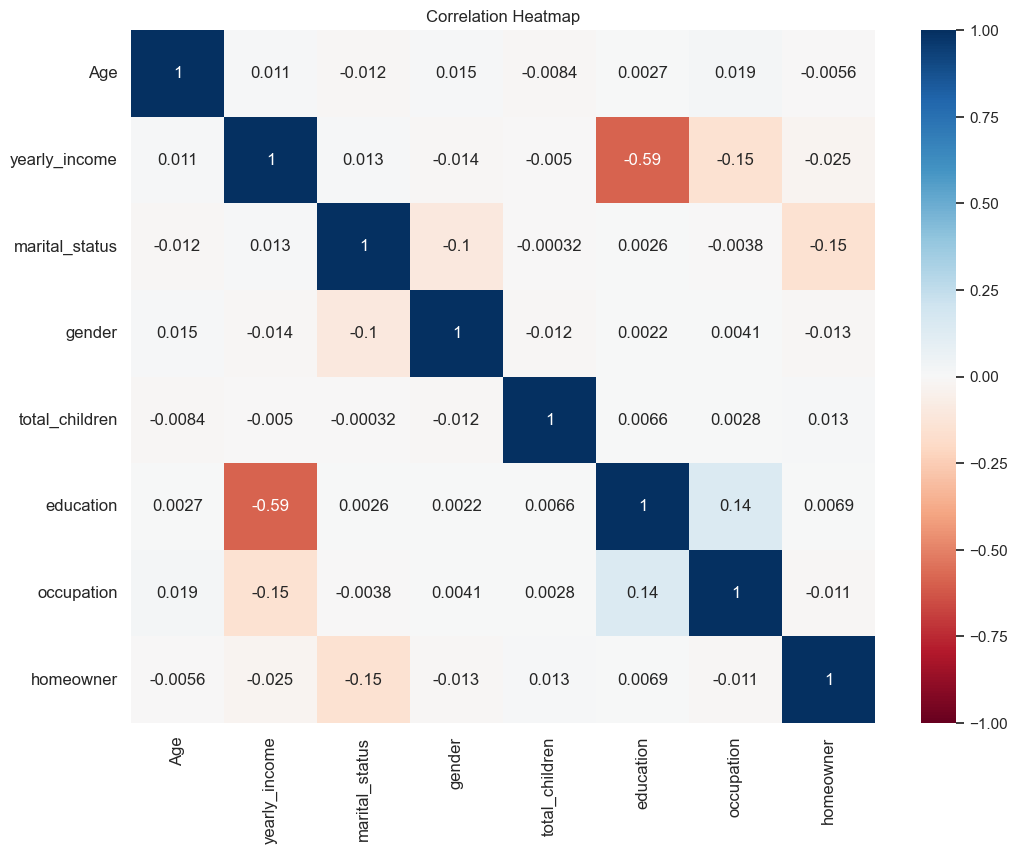

In [17]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(new_df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
new_df1 = scaler.fit_transform(new_df)

In [20]:
new_df1

array([[-0.70155693,  0.26441995, -1.47349605, ...,  1.21501544,
         1.2510726 ,  0.81345561],
       [-0.70155693,  1.1752933 ,  0.67865808, ...,  1.21501544,
         0.31570227, -1.22932337],
       [-1.07579197,  0.71985663, -1.47349605, ..., -1.39269266,
         0.31570227,  0.81345561],
       ...,
       [-1.07579197, -0.6464534 ,  0.67865808, ...,  1.21501544,
        -1.55503839,  0.81345561],
       [ 1.69354732, -0.19101672, -1.47349605, ..., -0.08883861,
         0.31570227,  0.81345561],
       [-0.70155693,  0.71985663,  0.67865808, ..., -1.39269266,
        -1.55503839, -1.22932337]])

In [21]:
#Hierarchical clustering with the Sci Py library. l use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(new_df1, method = 'ward')

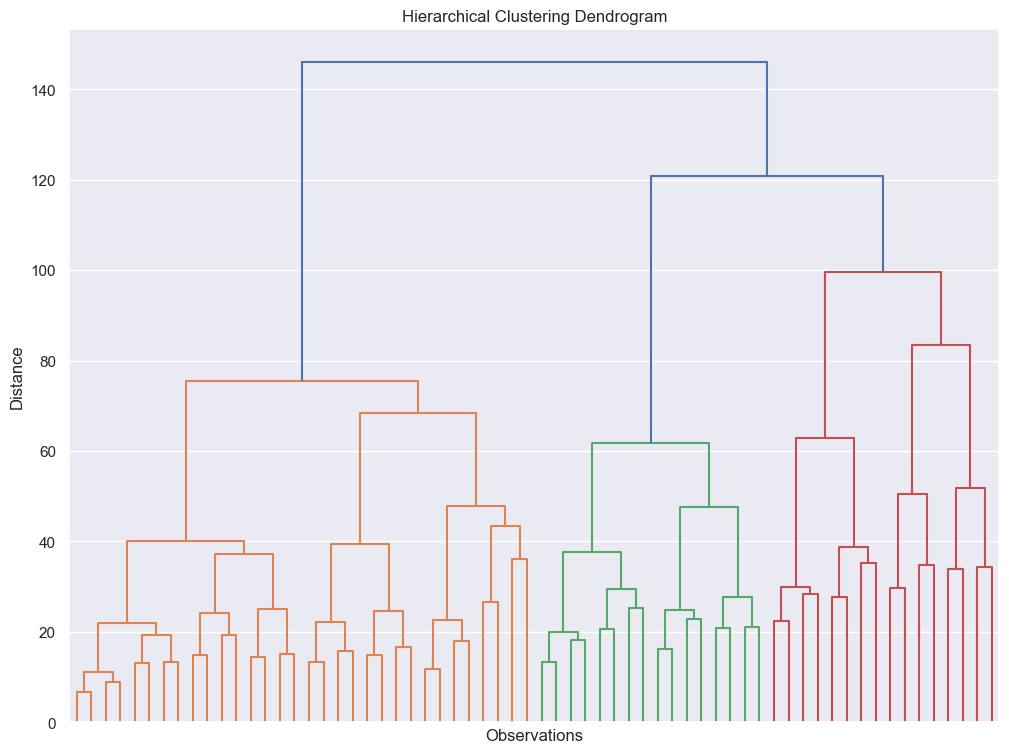

In [23]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

In [24]:

from sklearn.cluster import KMeans

In [25]:
# Perform K-means clustering. I considered 1 to 10 clusters, so our for loop runs 10 iterations.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_df1)
    wcss.append(kmeans.inertia_)

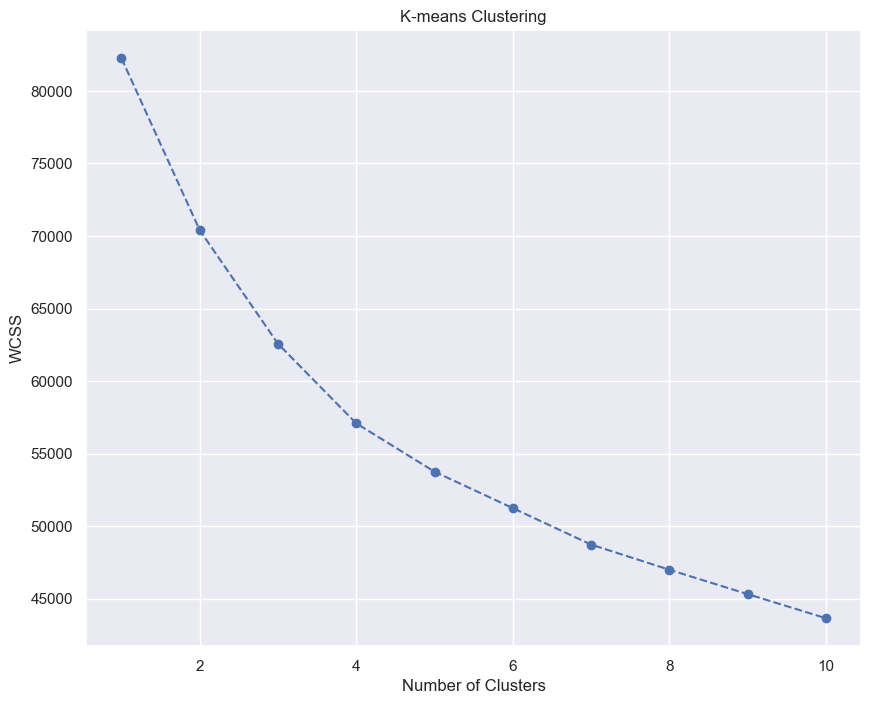

In [26]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [27]:
# I run K-means with a fixed number of clusters. In this case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [28]:

kmeans.fit(new_df1)

KMeans(n_clusters=4, random_state=42)

In [29]:
df_copy['Segment K-means'] = kmeans.labels_

In [30]:
df_copy.head()

,customer_id,Age,yearly_income,marital_status,gender,total_children,education,occupation,homeowner,Segment K-means
0,1,23,$30K - $50K,M,F,4,Partial High School,Skilled Manual,Y,2
1,2,23,$70K - $90K,S,M,1,Partial High School,Professional,N,0
2,3,18,$50K - $70K,M,F,1,Bachelors Degree,Professional,Y,2
3,4,54,$10K - $30K,M,M,4,Partial High School,Skilled Manual,N,1
4,5,42,$30K - $50K,S,F,3,Partial College,Manual,N,3


In [31]:
# Calculate mean values for the clusters
df_copy.groupby(['Segment K-means'])[['Age','total_children']].mean()

,Age,total_children
Segment K-means,,
0,32.463631,2.468374
1,32.256846,2.514523
2,32.606085,2.505204
3,32.107644,2.535957


In [32]:
status = pd.crosstab(index=df_copy["marital_status"], columns=df_copy["Segment K-means"])
color_status = status.style.background_gradient()
color_status

Segment K-means,0,1,2,3
marital_status,,,,
M,0,744,2498,0
S,3162,1666,0,2211


In [33]:
sex = pd.crosstab(index=df_copy["gender"], columns=df_copy["Segment K-means"])
color_sex = sex.style.background_gradient()
color_sex

Segment K-means,0,1,2,3
gender,,,,
F,0,843,730,2211
M,3162,1567,1768,0


In [34]:
home = pd.crosstab(index=df_copy["homeowner"], columns=df_copy["Segment K-means"])
color_home = home.style.background_gradient()
color_home

Segment K-means,0,1,2,3
homeowner,,,,
N,1496,951,718,929
Y,1666,1459,1780,1282


In [35]:
occ = pd.crosstab(index=df_copy["occupation"], columns=df_copy["Segment K-means"])
color_occ = occ.style.background_gradient()
color_occ

Segment K-means,0,1,2,3
occupation,,,,
Clerical,91,1,65,48
Management,536,55,466,404
Manual,630,1063,474,416
Professional,1256,229,1000,897
Skilled Manual,649,1062,493,446


In [36]:
income = pd.crosstab(index=df_copy["yearly_income"], columns=df_copy["Segment K-means"])
color_income = income.style.background_gradient()
color_income

Segment K-means,0,1,2,3
yearly_income,,,,
$10K - $30K,29,2135,38,20
$110K - $130K,102,168,132,91
$130K - $150K,153,97,137,119
$150K +,73,10,76,64
$30K - $50K,1381,0,1022,924
$50K - $70K,766,0,574,505
$70K - $90K,474,0,380,353
$90K - $110K,184,0,139,135


In [37]:
edu = pd.crosstab(index=df_copy["education"], columns=df_copy["Segment K-means"])
color_edu = edu.style.background_gradient()
color_edu

Segment K-means,0,1,2,3
education,,,,
Bachelors Degree,1074,0,827,718
Graduate Degree,209,0,167,163
High School Degree,1175,89,960,815
Partial College,398,51,282,259
Partial High School,306,2270,262,256


In [38]:
# Add the segment labels to our table
df_copy['Labels'] = df_copy['Segment K-means'].map({0:'Young Professionals', 
                                                                  1:'Middle-income Families',
                                                                  2:'Educated Achievers', 
                                                                  3:'Affluent Females'})

In [39]:
df['Labels'] = df_copy['Labels']

In [40]:
df.head()

,customer_id,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,customer_postal_code,customer_country,birthdate,...,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner,Year,Age,Labels
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,2000-08-26,...,4,2,Partial High School,09/10/1991,Bronze,Skilled Manual,Y,2000,23,Educated Achievers
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,2000-07-03,...,1,0,Partial High School,03/11/1993,Bronze,Professional,N,2000,23,Young Professionals
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,2005-06-21,...,1,1,Bachelors Degree,06/11/1991,Bronze,Professional,Y,2005,18,Educated Achievers
3,4,87500482201,Michael,Spence,337 Tosca Way,Burnaby,BC,74674,Canada,1969-06-20,...,4,4,Partial High School,5/21/1994,Normal,Skilled Manual,N,1969,54,Middle-income Families
4,5,87514054179,Maya,Gutierrez,8668 Via Neruda,Novato,CA,57355,USA,1981-05-10,...,3,0,Partial College,8/21/1992,Silver,Manual,N,1981,42,Affluent Females


In [41]:
city = pd.crosstab(index=df["customer_state_province"], columns=df["Labels"])
color_city = city.style.background_gradient()
color_city

Labels,Affluent Females,Educated Achievers,Middle-income Families,Young Professionals
customer_state_province,,,,
BC,386,425,390,516
CA,891,1001,1001,1329
DF,68,81,92,106
Guerrero,22,24,32,28
Jalisco,21,27,27,29
Mexico,16,29,19,33
OR,232,234,245,340
Oaxaca,14,24,24,28
Sinaloa,20,17,21,20


In [42]:
card = pd.crosstab(index=df["member_card"], columns=df["Labels"])
color_card = card.style.background_gradient()
color_card

Labels,Affluent Females,Educated Achievers,Middle-income Families,Young Professionals
member_card,,,,
Bronze,1556,1564,241,2342
Golden,278,539,82,299
Normal,117,141,1989,173
Silver,260,254,98,348
